In [3]:
# Farmer's Markets, farmers markets accepting SNAP. FMRKT13, FMRKT18, PCH_FMRKT_13_18, 
# FMRKT_SNAP18, PCT_FMRKT_SNAP18
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import openpyxl

# File to Load
state_and_county_variables_values = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas2/StateAndCountyData.csv")
population_data = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas2/SupplementalDataCounty.csv")
environmental_atlas = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas2/FoodEnvironmentAtlas.xls")
# Read the modified state_and_county csv and store into Pandas DataFrame
Population_Data_df = pd.read_csv(population_data, encoding="utf-8")
state_and_county_df = pd.read_csv(state_and_county_variables_values, encoding="utf-8")
state_and_county_df.head()
health_data = "HEALTH"
environmental_atlas_df = pd.read_excel(environmental_atlas, "LOCAL")

georgia_county_filter = environmental_atlas_df['State']== 'GA'

GAcounties = environmental_atlas_df.loc[georgia_county_filter, ["State", "County", "FMRKT13", "FMRKT18", "PCH_FMRKT_13_18", "FMRKT_SNAP18", "PCT_FMRKT_SNAP18"]]

GAcounties.reset_index()


,index,State,County,FMRKT13,FMRKT18,PCH_FMRKT_13_18,FMRKT_SNAP18,PCT_FMRKT_SNAP18
0,387,GA,Appling,0.0,0.0,0.000000,0.0,0.0
1,388,GA,Atkinson,0.0,0.0,0.000000,0.0,0.0
2,389,GA,Bacon,0.0,0.0,0.000000,0.0,0.0
3,390,GA,Baker,0.0,0.0,0.000000,0.0,0.0
4,391,GA,Baldwin,3.0,4.0,33.333332,1.0,25.0
...,...,...,...,...,...,...,...,...
154,541,GA,Whitfield,0.0,1.0,NaN,1.0,100.0
155,542,GA,Wilcox,0.0,0.0,0.000000,0.0,0.0
156,543,GA,Wilkes,1.0,1.0,0.000000,0.0,0.0
157,544,GA,Wilkinson,0.0,0.0,0.000000,0.0,0.0


In [4]:
# Rename the columns
col = {
    "FMRKT13": "2013 Farmer's Market Availability",
    "FMRKT18": "2018 Farmer's Market Availability",
    "PCH_FMRKT_13_18": "(%) Change Farmer's Markets",
    "FMRKT_SNAP18": "Farmer's Markets Accepting SNAP",
    "PCT_FMRKT_SNAP18": "(%) Farmer's Markets Accepting SNAP"

}

GAcounties.rename(columns=col, inplace=True)

# Print the DataFrame with the new column names
GAcounties.reset_index()

,index,State,County,2013 Farmer's Market Availability,2018 Farmer's Market Availability,(%) Change Farmer's Markets,Farmer's Markets Accepting SNAP,(%) Farmer's Markets Accepting SNAP
0,387,GA,Appling,0.0,0.0,0.000000,0.0,0.0
1,388,GA,Atkinson,0.0,0.0,0.000000,0.0,0.0
2,389,GA,Bacon,0.0,0.0,0.000000,0.0,0.0
3,390,GA,Baker,0.0,0.0,0.000000,0.0,0.0
4,391,GA,Baldwin,3.0,4.0,33.333332,1.0,25.0
...,...,...,...,...,...,...,...,...
154,541,GA,Whitfield,0.0,1.0,NaN,1.0,100.0
155,542,GA,Wilcox,0.0,0.0,0.000000,0.0,0.0
156,543,GA,Wilkes,1.0,1.0,0.000000,0.0,0.0
157,544,GA,Wilkinson,0.0,0.0,0.000000,0.0,0.0


In [5]:
# Sort the DataFrame based on the "2013 Farmer's Market" column in descending order
GAcounties_sorted = GAcounties.sort_values(by="2013 Farmer's Market Availability", ascending=False)

# Get the top 5 counties with the highest values
top_5_counties = GAcounties_sorted.head(5)

# Get the bottom 5 counties with the lowest values
bottom_5_counties = GAcounties_sorted.tail(5)

# Print the top and bottom 5 counties
print("Counties with the Most Access to Farmer's Markets:")
top_5_counties.reset_index()

Counties with the Most Access to Farmer's Markets:


,index,State,County,2013 Farmer's Market Availability,2018 Farmer's Market Availability,(%) Change Farmer's Markets,Farmer's Markets Accepting SNAP,(%) Farmer's Markets Accepting SNAP
0,446,GA,Fulton,15.0,16.0,6.666667,7.0,43.750000
1,430,GA,DeKalb,10.0,13.0,30.000000,9.0,69.230766
2,453,GA,Gwinnett,6.0,8.0,33.333332,2.0,25.000000
3,419,GA,Cobb,5.0,6.0,20.000000,1.0,16.666666
4,415,GA,Clarke,5.0,5.0,0.000000,5.0,100.000000


In [6]:
print("\nCounties with the Least Access to Farmer's Markets:")
bottom_5_counties.reset_index()


Counties with the Least Access to Farmer's Markets:


,index,State,County,2013 Farmer's Market Availability,2018 Farmer's Market Availability,(%) Change Farmer's Markets,Farmer's Markets Accepting SNAP,(%) Farmer's Markets Accepting SNAP
0,450,GA,Gordon,0.0,1.0,NaN,0.0,0.0
1,449,GA,Glynn,0.0,0.0,0.0,0.0,0.0
2,448,GA,Glascock,0.0,0.0,0.0,0.0,0.0
3,441,GA,Fannin,0.0,0.0,0.0,0.0,0.0
4,466,GA,Jeff Davis,0.0,0.0,0.0,0.0,0.0


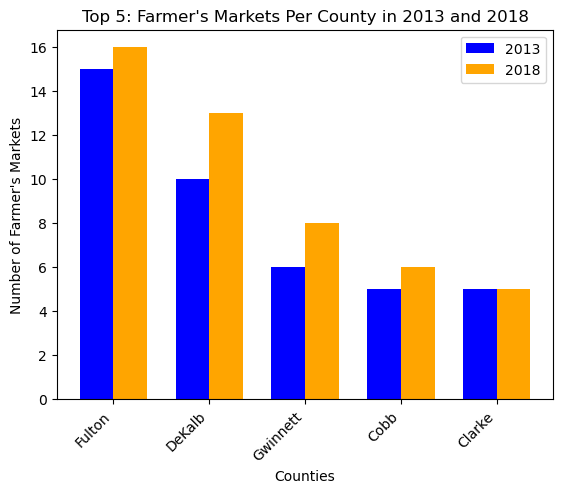

In [10]:
# Extract relevant columns
counties = top_5_counties["County"]
availability_2013 = top_5_counties["2013 Farmer's Market Availability"]
availability_2018 = top_5_counties["2018 Farmer's Market Availability"]

# Plot the bar chart
bar_width = 0.35
bar_positions_1 = np.arange(len(counties))
bar_positions_2 = bar_positions_1 + bar_width

plt.bar(bar_positions_1, availability_2013, width=bar_width, label='2013', color='blue')
plt.bar(bar_positions_2, availability_2018, width=bar_width, label='2018', color='orange')

# Add labels and title
plt.xlabel('Counties')
plt.ylabel('Number of Farmer\'s Markets')
plt.title('Top 5: Farmer\'s Markets Per County in 2013 and 2018')
plt.xticks(bar_positions_1 + bar_width / 2, counties, rotation=45, ha='right')
plt.legend()

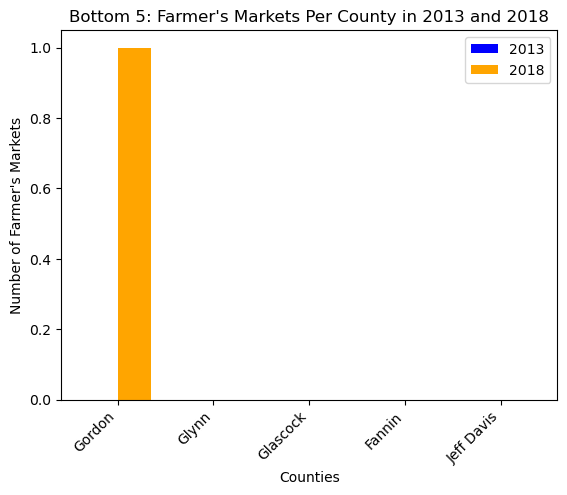

In [11]:
# Extract relevant columns
counties = bottom_5_counties["County"]
availability_2013 = bottom_5_counties["2013 Farmer's Market Availability"]
availability_2018 = bottom_5_counties["2018 Farmer's Market Availability"]

# Plot the bar chart
bar_width = 0.35
bar_positions_1 = np.arange(len(counties))
bar_positions_2 = bar_positions_1 + bar_width

plt.bar(bar_positions_1, availability_2013, width=bar_width, label='2013', color='blue')
plt.bar(bar_positions_2, availability_2018, width=bar_width, label='2018', color='orange')

# Add labels and title
plt.xlabel('Counties')
plt.ylabel('Number of Farmer\'s Markets')
plt.title('Bottom 5: Farmer\'s Markets Per County in 2013 and 2018')
plt.xticks(bar_positions_1 + bar_width / 2, counties, rotation=45, ha='right')
plt.legend()